In [1]:
import pandas as pd
import numpy as np

# listings = pd.read_csv("CPH\listings.csv")
# reviews = pd.read_csv("CPH\reviews.csv")
# listingsSummary = pd.read_csv("CPH\listingsSummary.csv")

In [2]:
listings = pd.read_csv("CPH\listings.csv")
# reviews = pd.read_csv("CPH\reviews.csv")
listingsSummary = pd.read_csv("CPH\listingsSummary.csv")

C:\Users\Atchapero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listingsSummary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68798,12.54571,Private room,363,2,167,2019-02-01,1.45,1,0
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69163,12.57459,Entire home/apt,2100,3,43,2018-10-04,0.68,1,320
2,26473,City Centre Townhouse Sleeps 1-12 persons,112210,Oliver,NaN,Indre By,55.67590,12.57698,Entire home/apt,3097,3,245,2019-02-13,2.41,3,96
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.67069,12.55430,Entire home/apt,799,7,20,2018-07-02,0.19,1,238
4,29618,Artsy and familyfriendly home in lovely Copenh...,127577,Simon And Anna,NaN,sterbro,55.69375,12.56945,Entire home/apt,859,7,87,2014-08-19,0.84,1,0


# EXPLANATORY TEXT

1) Calculate for each listing its total availability over the, % booked. Combine with dataframe to insert total earnings.
		
* 1-1) Turned out to be a false lead. Availability != bookings. However, we can still use the prices to calculate ~potential maximum~ earnings. <- VIZ THIS
		
* 1-2) Look for minima and maxima. What are min/max prices? What's the distribution of prices?
		
* 1-3) What's the distribution of availability? Can we say anything about the general landscape of availability? (Probably not. Availability is not equal to (dis)use, nor present/absent hosts.)
		
* 1-4) I want a scatter plot with availability/pricing.
		
* 1-5) We may be able to use reviews per months as an indicator of how much "traffic" a listing gets. Perhaps then we can calculate how much a listing was put to ~USE~ (remember this is not an accurate metric of a listing's use, but an indicator. We're assuming there's a correlation between reviews and usage).
		
* 1-6) Can we compare Airbnb pricings with CPH hotel prices? Apartment prices?

## 1-1) Potential maximum earnings
Cap availability at 70, then time that with the price of the room.

In [15]:
potential_maximum_earnings = []

for i in range(0,listingsSummary.count()[0]):
    a = listingsSummary.iloc[i,15]
    if (a > 70):
        a = 70
    price = listingsSummary.iloc[i,9]
    potential_maximum_earnings.append(a * price)

In [16]:
# Add list as new column.
listingsSummary['potential_maximum_earnings'] = pd.Series(potential_maximum_earnings, index=listingsSummary.index)

In [20]:
listingsSummary.sort_values('potential_maximum_earnings').tail(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,potential_maximum_earnings
25099,30173818,Beautiful 125m apt close downtown /train st.,4382671,Manuela,NaN,sterbro,55.69846,12.58166,Entire home/apt,3500,5,0,NaN,NaN,1,223,245000
3089,3845622,Stunning Penthouse in the heart of CPH,1129253,Jakob,NaN,Indre By,55.67490,12.59176,Entire home/apt,3500,3,97,2018-12-17,2.05,2,321,245000
8342,10260919,232 sqm. luxury in the city center,4049662,Trine,NaN,Indre By,55.67788,12.59032,Entire home/apt,3500,6,6,2018-09-17,0.18,1,126,245000
151,392750,Big flat in charming area near lake,542873,Frederikke,NaN,Nrrebro,55.68952,12.55912,Private room,3500,3,1,2015-05-29,0.02,3,364,245000
964,1273922,House with private pool. Near city.,6934361,Anders,NaN,Amager st,55.65411,12.63929,Entire home/apt,3500,3,8,2018-07-24,0.12,1,239,245000
5200,6588239,Panorama view in central Copenhagen,34148531,Lasse,NaN,Indre By,55.68365,12.61484,Entire home/apt,3500,1,7,2016-10-11,0.17,1,365,245000
22780,26391701,In the heart of Christianshavn. Your go to place.,62783081,Marcus,NaN,Indre By,55.67368,12.59099,Entire home/apt,3500,2,2,2018-07-11,0.26,1,365,245000
24051,28148021,Modern and bright apartment in city center of CPH,3326097,Ira,NaN,Indre By,55.68057,12.58923,Entire home/apt,3500,3,1,2018-09-17,0.19,21,365,245000
17407,19938224,central cph top floor flat 160 sqm stunning views,34576863,Peter,NaN,sterbro,55.69423,12.57027,Entire home/apt,3500,3,1,2017-08-13,0.05,1,363,245000
20747,23914831,CPH CENTER 2,179753578,Peter,NaN,Indre By,55.68065,12.58360,Entire home/apt,3500,2,13,2019-01-05,1.26,23,214,245000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002349A874B70>]],
      dtype=object)

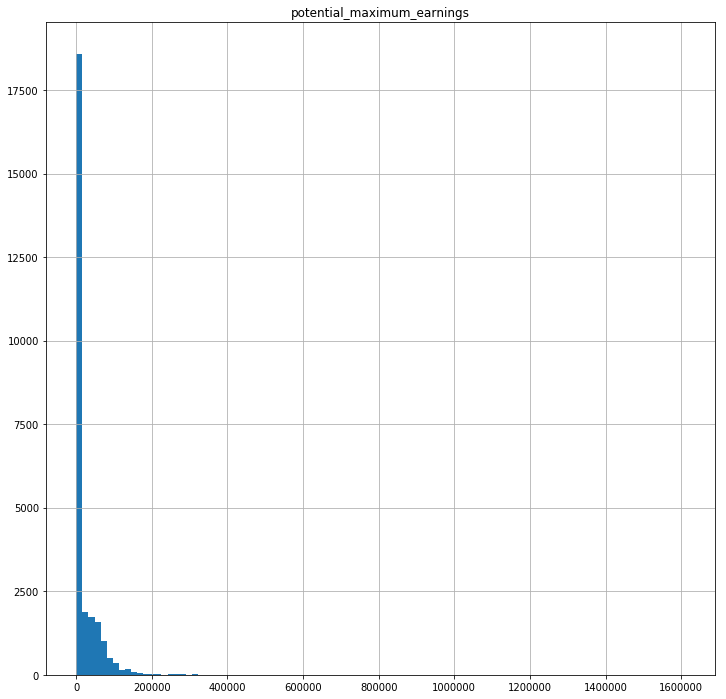

In [25]:
listingsSummary.hist(column='potential_maximum_earnings', bins=100,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002349A7397B8>]],
      dtype=object)

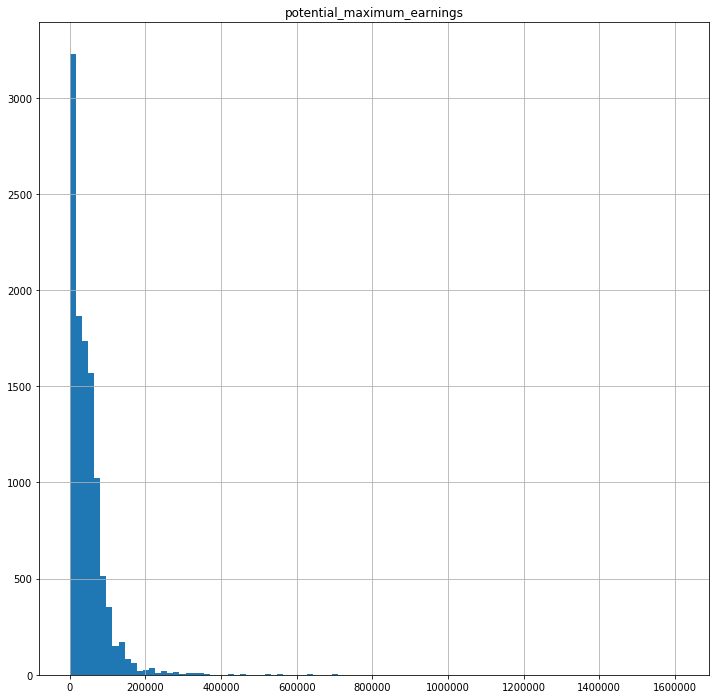

In [34]:
# Dropping the 0, what do we get?
listingsSummary[listingsSummary.potential_maximum_earnings > 0].hist(column='potential_maximum_earnings', bins=100,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A2EE8C88>]],
      dtype=object)

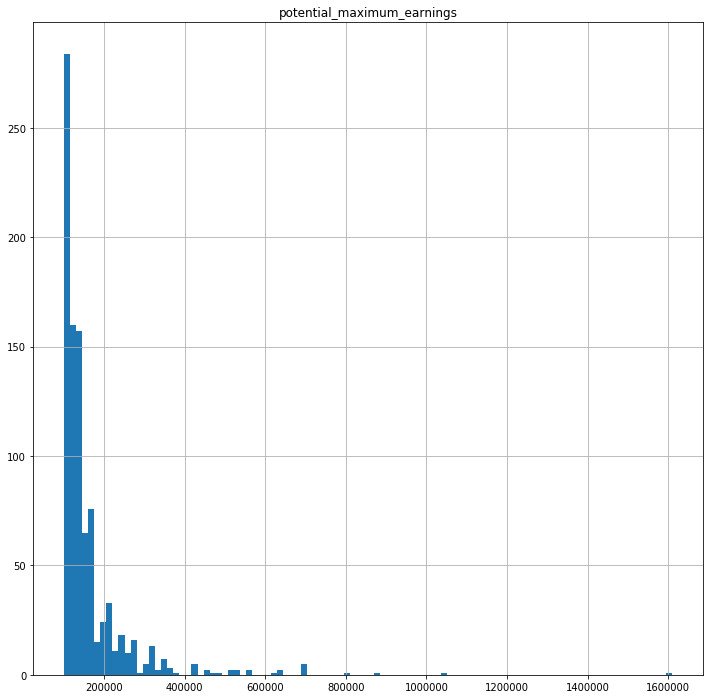

In [35]:
# More than 100k
listingsSummary[listingsSummary.potential_maximum_earnings > 100000].hist(column='potential_maximum_earnings', bins=100,figsize=(12,12))

Now, I believe that reviews per month is an indicator (but not metric) of "general popularity". So what if we use popularity as a way to filter out unused listings?

We'll make a scatter plot with popularity/maximum potential earnings.

In [36]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

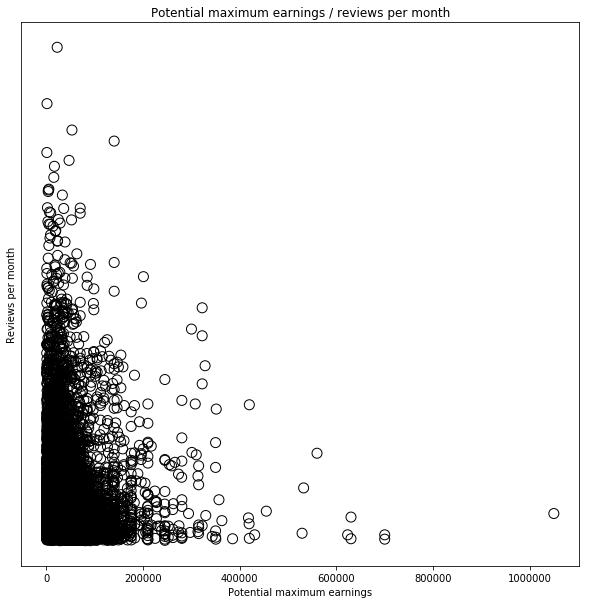

In [59]:
x = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['potential_maximum_earnings']
y = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['reviews_per_month']

plt.figure(figsize=(10,10))
plt.scatter(x, y, s=100, facecolors='none', edgecolors='k')
plt.title("Potential maximum earnings / reviews per month")
plt.yticks([],[])
plt.xlabel("Potential maximum earnings")
plt.ylabel("Reviews per month")

plt.show()

### Findings

As expected, we find the maximum potential earnings skewed towards 0.

The distribution doesn't tell us much by itself, but the scatter plot reveals which of the high earners are put to use. The more reviews per month, the more likely the maximum potential earning is reached.

In other words, if we use the reviews per months as a "score" of the potential of reaching maximum earnings, what result do we then get? We can do this by multiplying the reviews per month with the maximum earnings. To avoid maximum earnings being multiplied above 1, we normalize the maximum earnings.

In [60]:
listingsSummary['reviews_per_month'].describe()

count    21926.000000
mean         0.708811
std          0.943883
min          0.010000
25%          0.170000
50%          0.400000
75%          0.850000
max         12.530000
Name: reviews_per_month, dtype: float64

In [105]:
maxReviewsPerMonth = 12.53

In [106]:
# Grab relevant columns.
df0 = listingsSummary.loc[:,['reviews_per_month','potential_maximum_earnings']]
# Normalize the reviews.
df0['reviews_per_month'] = df0['reviews_per_month'].apply(lambda g: g / maxReviewsPerMonth)

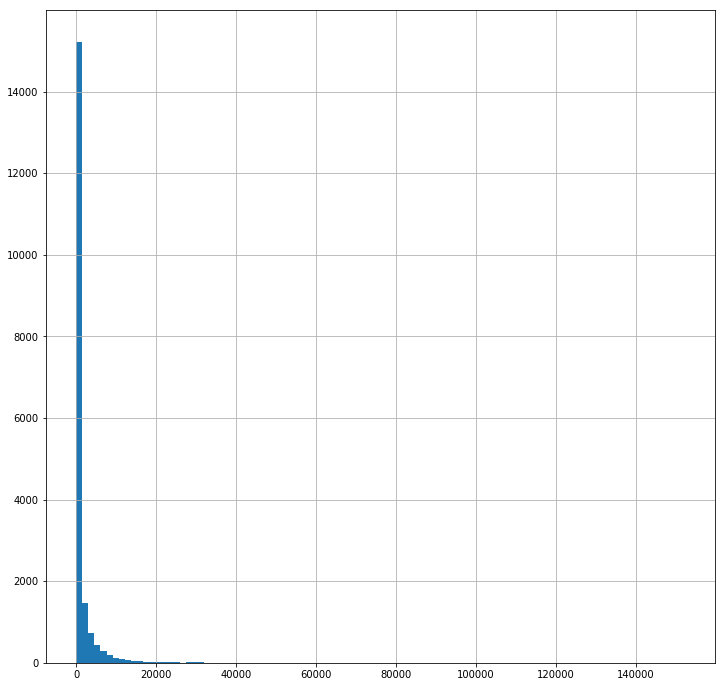

In [107]:
result = []
for i in range(0,df0.count()[0]):
    result.append(df0.iloc[i,0] * df0.iloc[i,1])
pd.Series(result).hist(bins=100,figsize=(12,12))

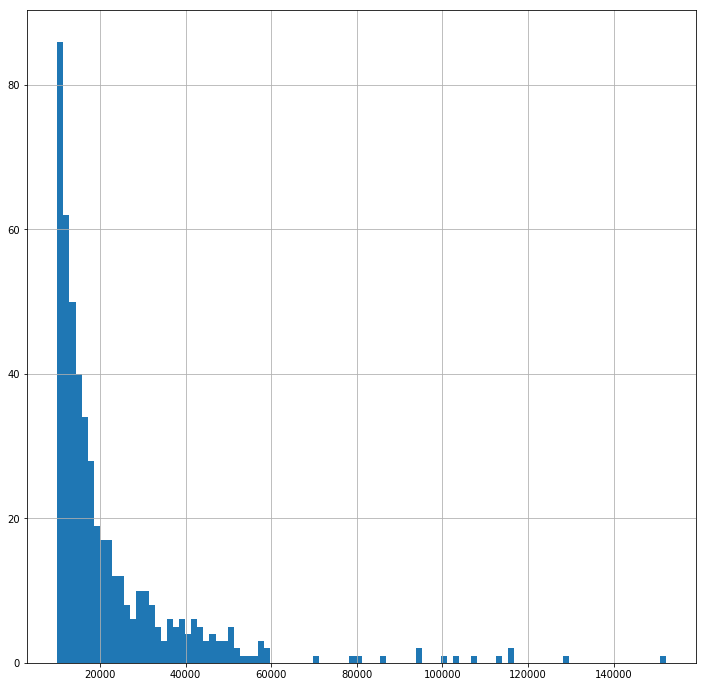

In [110]:
# If we only consider earnings above 10000.

result2 = []
for i in range(0,df0.count()[0]):
    v = df0.iloc[i,0] * df0.iloc[i,1]
    if (v > 10000):
        result2.append(v)
pd.Series(result2).hist(bins=100,figsize=(12,12))

### Who is the person that's likely to earn more than 150.000 DKK?

In [111]:
pd.Series(result).describe()

count     18904.000000
mean       1376.032716
std        4842.286079
min           0.000000
25%           0.000000
50%           0.000000
75%         879.389665
max      152233.296089
dtype: float64

In [112]:
for i in range(0,len(result)):
    if result[i] > 150000:
        print(i)

19051


In [114]:
df0[19049:19054]

,reviews_per_month,potential_maximum_earnings
19049,NaN,0
19050,0.034318,5409
19051,0.472466,322210
19052,0.050279,0
19053,0.085395,0


So this person receives one review every two months. Assuming the place is available at least 70 days a year, the price is 322,210 DKK / 70 days = 4,603 DKK for one day's stay.

We obviously know nothing about the actual numbers of exactly how many days of actual bookings and earnings this particular listing has - our score is only a prediction, a likelyhood of high earnings. What we're saying is that it's quite likely that this particular listing is a top earner on Airbnb.

## 1-2) Price distribution

We can do the same with pricing instead of maximum potential earnings. Distribution and scatter plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A3B203C8>]],
      dtype=object)

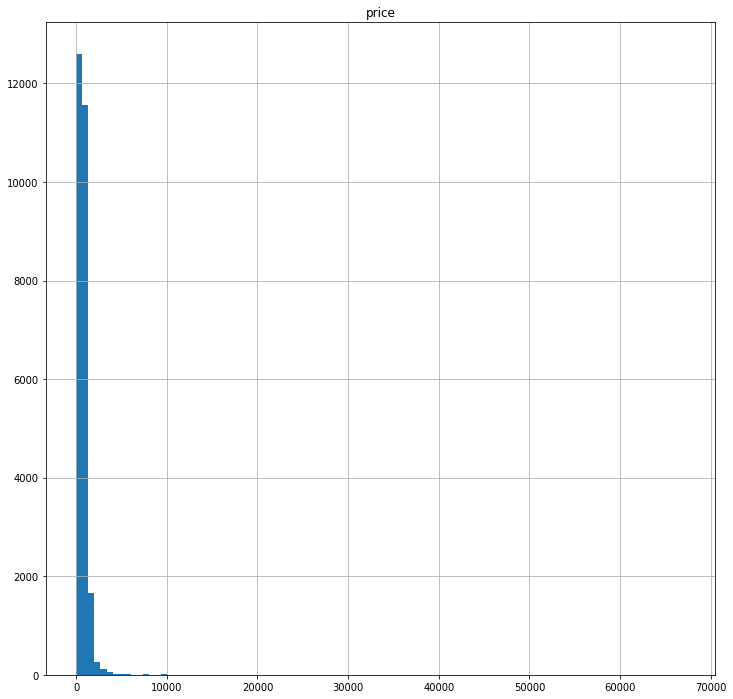

In [41]:
listingsSummary.hist(column='price', bins=100,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A5DA4438>]],
      dtype=object)

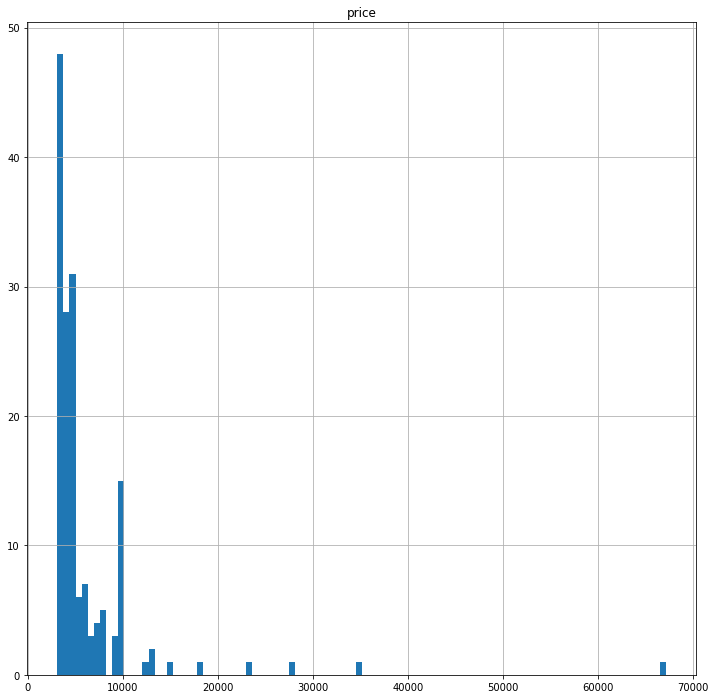

In [50]:
# What's the distribution at the top, above 3000 DKK?
listingsSummary[listingsSummary.price > 3000].hist(column='price', bins=100,figsize=(12,12))

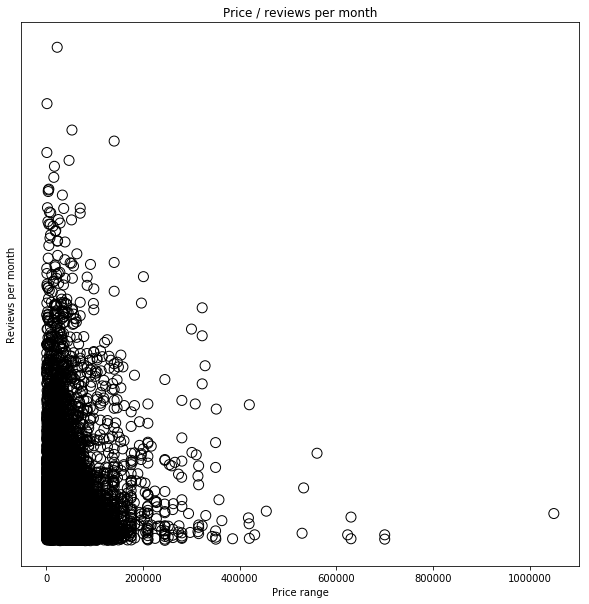

In [57]:
# Let's do another scatter plot, with price/reviews per month.
x2 = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['potential_maximum_earnings']
y2 = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['reviews_per_month']

plt.figure(figsize=(10,10))
plt.scatter(x2, y2, s=100, facecolors='none', edgecolors='k')
plt.title("Price / reviews per month")
plt.yticks([],[])
plt.xlabel("Price range")
plt.ylabel("Reviews per month")

plt.show()

Again, we can do something similar to maximum potential earnings. If we use the reviews per month as a score for popularity, and multiply that with the price, we can get another "scoring" of high earnings, a predictive metric.

The obvious question is, are these results consistent with our potential maximum earnings? Our potential maximum earnings vs number of reviews?

In [119]:
score1 = []
score2 = []

for i in range(0,listingsSummary.count()[0]):
    price = listingsSummary.iloc[i,9]
    reviews_per_month = listingsSummary.iloc[i,13]
    number_of_reviews = listingsSummary.iloc[i,11]
    score1.append(price * reviews_per_month)
    score2.append(price * number_of_reviews)

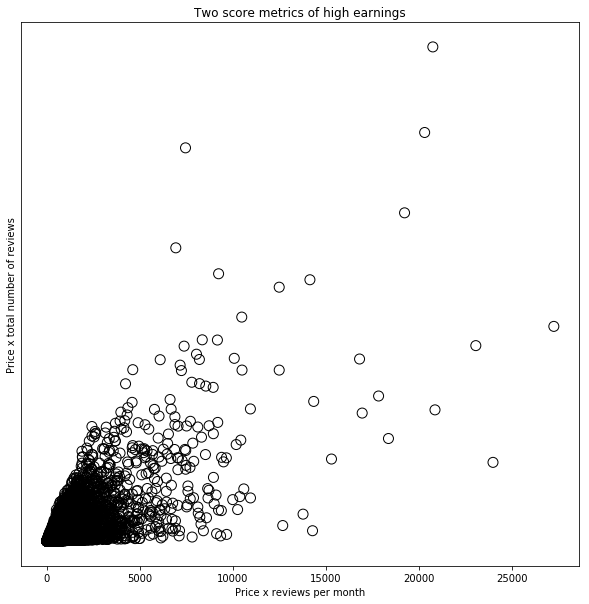

In [120]:
plt.figure(figsize=(10,10))
plt.scatter(score1, score2, s=100, facecolors='none', edgecolors='k')
plt.title("Two score metrics of high earnings")
plt.yticks([],[])
plt.xlabel("Price x reviews per month")
plt.ylabel("Price x total number of reviews")

plt.show()

So what the hell we lookin' at? On both X and Y axis, we have two different metrics for scoring high earning listings. In other words, the best overall listing earnings are to the top right, and the worst earning listings are at the bottom left.

Why use two scores? If a listing is to the right bottom, it has a good price and high reviews per month, but low total reviews - which implies that the listing has only recently been in Airbnb, thus the total earning from the listing is not that high. Equally, a listing to the top left has a good price and many total reviews, but it is infrequently put to use comparatively.

## 1-3) Availability

And we'll do the same with availability.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A67DC908>]],
      dtype=object)

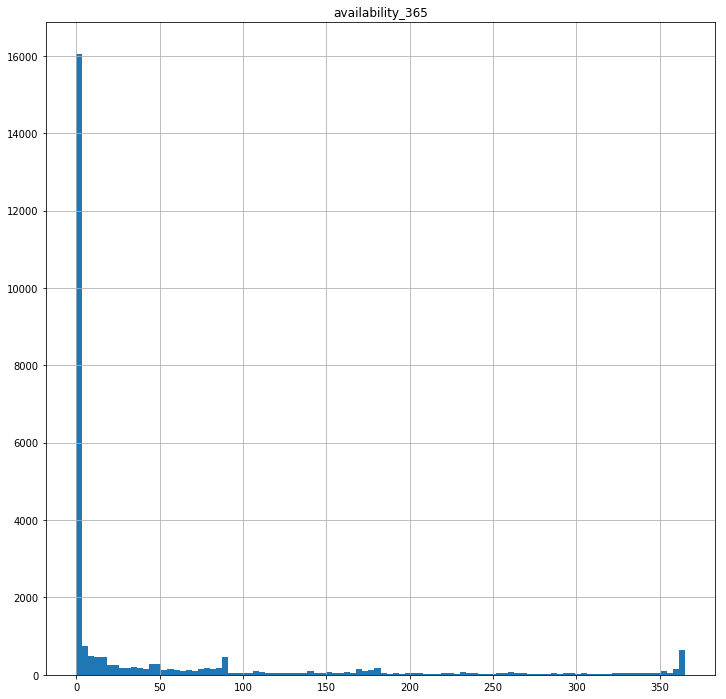

In [52]:
listingsSummary.hist(column='availability_365', bins=100,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A67EC828>]],
      dtype=object)

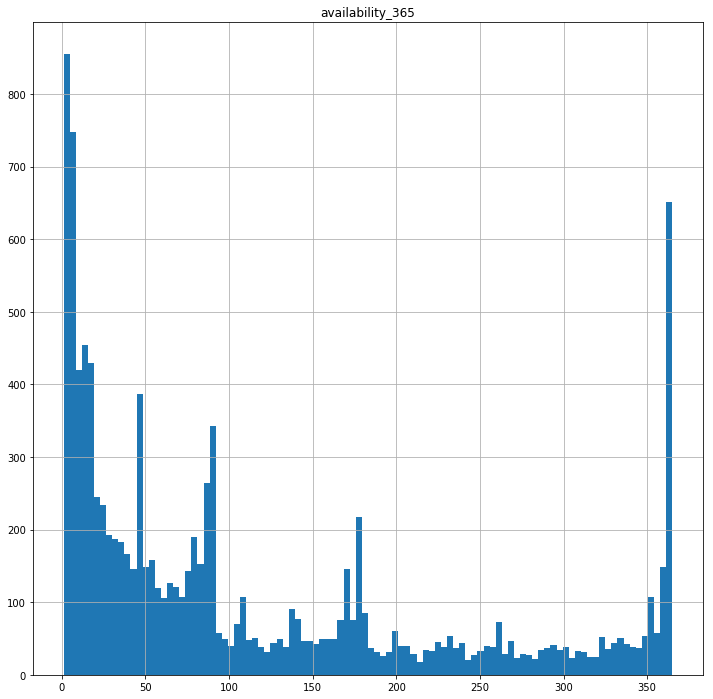

In [53]:
listingsSummary[listingsSummary.availability_365 > 0].hist(column='availability_365', bins=100,figsize=(12,12))

### JUST A MOMENT PLEASE

These two graphs are interesting. The first one implies that the vast majority of listings are no longer put in use in practice.

The second one excludes the unused listings and looks at those actually put to use. We find a skewed distribution... at the both ends? The vast majority of listings are only available for short periods. However, we find a large number of listings are available all-year-round!

We cannot infer anything about these listings. Remember that availability is not the same as actualy bookings. Now if a listing is available for booking the entire year round, it says nothing about the host - the quality of their hosting, their listing, or whether they are present or absent. It could be that their schedule is flexible, they stay at home and are accommodating - or they are absent and just "renting" it out, and Airbnb pays bigger bucks than renting out to other Danes for proper living.

One such example (admittedly from 2016) is https://www.avisen.dk/scorer-kassen-paa-at-leje-ud-igennem-airbnb-gaar-den_395096.aspx

Here, an anonymous person tells that "renting" on Airbnb is more profitable than to Danes for proper living.

You can read the article in English with Google Translate - Danish tends to be similar enough to English for you to grasp the idea.

Now, I shall continue with graphs.

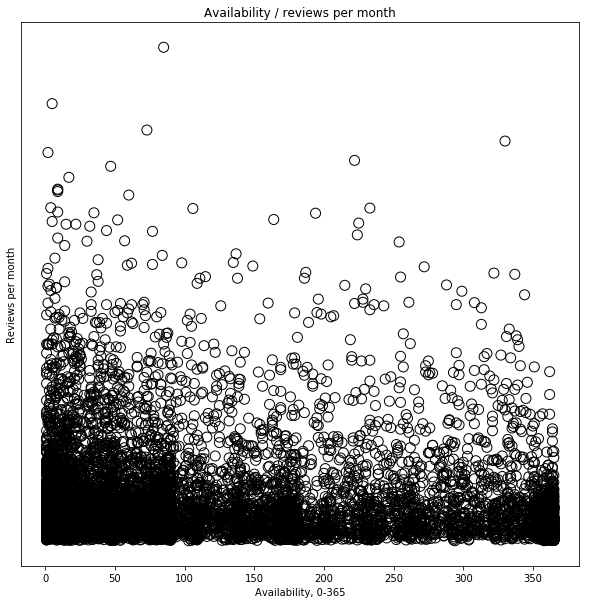

In [56]:
# Let's do another scatter plot, with availability/reviews per month.
x3 = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['availability_365']
y3 = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['reviews_per_month']

plt.figure(figsize=(10,10))
plt.scatter(x3, y3, s=100, facecolors='none', edgecolors='k')
plt.title("Availability / reviews per month")
plt.yticks([],[])
plt.xlabel("Availability, 0-365")
plt.ylabel("Reviews per month")

plt.show()

So the distribution here is pretty similar to that of general availability (the histogram just before this scatter plot). That means that the number of reviews probably does not correlate with availability at all - listings get reviews regardless of their yearly availability. So, which listings are picked by customers doesn't depend on availability at all.

Before the data reaveal, there's basically two reasonable guesses: It could be the case that more availability meant a higher likelihood of customers - and therefore also reviews, or it could be that there was no correlation at all, that customers simply picked whatever was available whenever. We inferred the latter from the scatter plot.

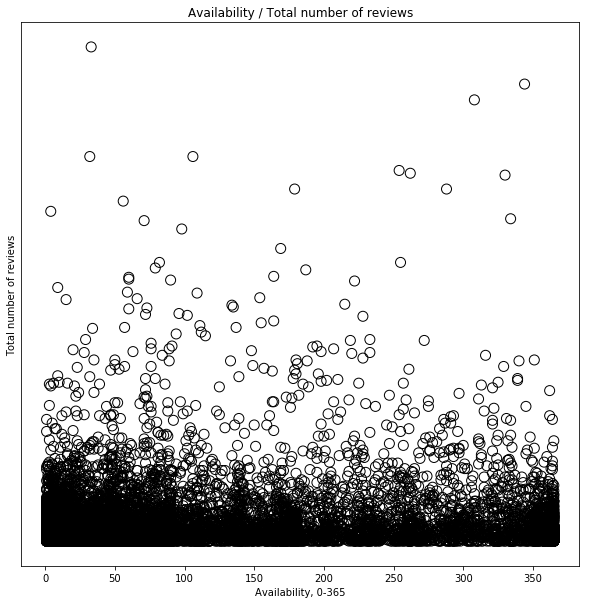

In [122]:
# And another one; Availability/reviews per month.
x4 = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['availability_365']
y4 = listingsSummary[listingsSummary.potential_maximum_earnings > 0]['number_of_reviews']

plt.figure(figsize=(10,10))
plt.scatter(x4, y4, s=100, facecolors='none', edgecolors='k')
plt.title("Availability / Total number of reviews")
plt.yticks([],[])
plt.xlabel("Availability, 0-365")
plt.ylabel("Total number of reviews")

plt.show()

Again, we find nothing conclusive - supporting our prior conclusion: It seems that availability does not correlate with popularity or use.

## 1-4) Comparing between the results

So our problem is this: Our metric, *potential maximum earnings*, is availability (at max 70) multiplied with the price. However, just the previous scatter plot reveled no correlation between availability and reviews per month.

Availability tells us about how much a listing can possibly earn, but how much they actually are put to use is *indicated* (and NOT measured!) by the reviews.

So this section asks: We already saw plots of reviews/prices and can assume that outliers are best earners.

* However, does those best earners correlate with potential maximum earnings? (We know it must to some extent, because best earners and maximum potential earnigs are both derived from prices).

* Can we include all factors to predict which listings are doing the best?

Obviously, machine learning could be useful for this, but I'm old-fashined and I'll simply look at what's already there in the data.

### 1-4-1) Scores of earning vs potential maximum earnings

The "scores of earning" refers to the scatter plot with two scores on X and Y axises. If we instead combine those two numbers into one, so a single total score of earnings, and scatter plot them against potential maximum earnings, we can see 1) which listings are earning and 2) which listings had the potential to earn well.

So does best earners correlate with potental maximum earnings?

Previously, score 1 was price X reviews per month, while score 2 was price X total number of reviews. We'll simply combine the two and make score 3 = price X reviews per month X total number of reviews.

In [130]:
df1 = listingsSummary.loc[:,['id','price', 'number_of_reviews', 'reviews_per_month', 'potential_maximum_earnings']]

In [132]:
for i in range(0,df1.count()[0]):
    price = df1.iloc[i,1]
    reviews_per_month = df1.iloc[i,2]
    number_of_reviews = df1.iloc[i,3]
    df1.iloc[i,0] = price * reviews_per_month * number_of_reviews

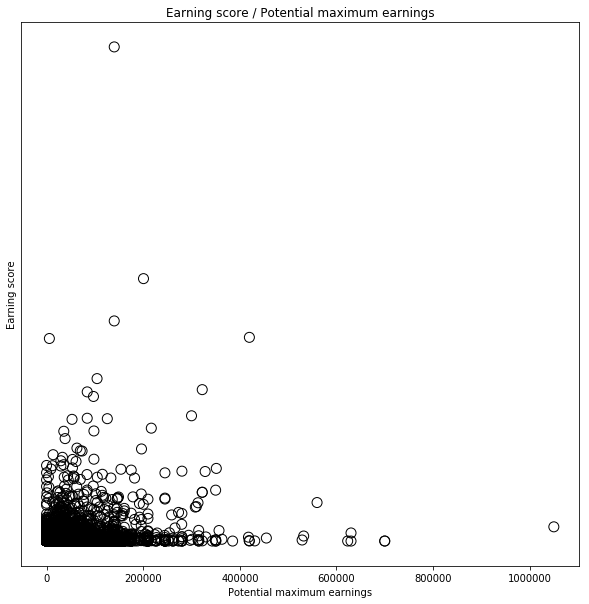

In [133]:
# And another one; Availability/reviews per month.
x5 = df1['potential_maximum_earnings']
y5 = df1['id']

plt.figure(figsize=(10,10))
plt.scatter(x5, y5, s=100, facecolors='none', edgecolors='k')
plt.title("Earning score / Potential maximum earnings")
plt.yticks([],[])
plt.xlabel("Potential maximum earnings")
plt.ylabel("Earning score")

plt.show()

As we can see, many of the potentially high earners are not doing well in earning score. That's the thick line at the bottom stretching onto the right. Our highest scoring earner has a low earning potential, and our highest earning potential has a low earning score.

Now, those are obviously the extreme outliers. We do see some outliers in the cluster that *(seemingly)* have some decent correlation. In fact, why don't we try calculating the correlation here?

In [135]:
df2 = df1.loc[:,['id','potential_maximum_earnings']]
df2.corr()

,id,potential_maximum_earnings
id,1.000000,0.219629
potential_maximum_earnings,0.219629,1.000000


If we take in all the data, we see that the correlation is there, but quite weak. Perhaps the thick cluster of points in the lower-left corner makes it difficult for us to visibly see this ourselves, but numbers are numbers.

But yes, there's a low correlation between potential earnings and earning score from reviews. This result makes sense, as availability did not seem to correlate with reviews either.

This also means it's really difficult to use availability as a factor into how much listings potentially earn - in other words, we shouldn't use availability as a metric for that! That also means it makes no sense to include all factors to predict highest earnings, thus ending the investigation here.

If we want to see highest earners, I recommend the scatter plot with the earning two scores from 1-2.

In [9]:
# Sorting by popularity
listingsSummary.fillna(value=0).sort_values('reviews_per_month').tail(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18261,20866124,HEART OF COPENHAGEN--CENTRAL/COSY/CLEAN/CHARMING,76125352,Alma,0.0,Indre By,55.68254,12.58291,Entire home/apt,753,1,102,2019-02-03,5.87,1,71
6900,7914887,Super cozy 2r in Central Nørrebro,5623793,Maria,0.0,Nrrebro,55.69285,12.55826,Entire home/apt,898,2,250,2019-02-03,5.89,1,60
19051,21691921,186m2 Live next to the Queen Pure Lux Copenhagen!,34105860,Den,0.0,Indre By,55.68344,12.59363,Entire home/apt,4603,1,90,2019-02-04,5.92,10,313
20162,23232095,Nice apartment in a quiet neighborhood in Amager,143980669,Jannick,0.0,Amager st,55.65799,12.62304,Entire home/apt,251,1,72,2019-02-16,5.97,1,126
18858,21453994,Private Room in area of the canals of CPH w/ b...,155737949,Michael,0.0,Vesterbro-Kongens Enghave,55.65023,12.55478,Private room,297,1,94,2019-02-01,5.97,1,243
24838,29680613,Cozy private room located near Nørrebro St CPH,94505196,Steffen,0.0,Bispebjerg,55.69987,12.53343,Private room,297,2,21,2019-02-13,6.00,1,295
24967,29950683,A big shared apartment,94599982,Mine,0.0,Amager st,55.66278,12.62941,Private room,449,1,10,2019-02-12,6.00,1,70
12509,14777761,Beautiful Christianshavn. Room with balcony,25705162,Jesper,0.0,Indre By,55.67095,12.58499,Private room,324,1,19,2019-02-13,6.00,2,62
24746,29505077,Gorgeous private room in centre of Copenhagen,73696521,Rebecca,0.0,Indre By,55.68039,12.59078,Private room,403,1,23,2019-02-07,6.00,1,44
25565,31019382,"The attic - light, private and cozy.",65332729,Max,0.0,Amager st,55.65998,12.61779,Entire home/apt,495,1,10,2019-02-16,6.00,1,33


In [3]:
listingsSummary.info()
o = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26334 entries, 0 to 26333
Data columns (total 16 columns):
id                                26334 non-null int64
name                              26262 non-null object
host_id                           26334 non-null int64
host_name                         26324 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     26334 non-null object
latitude                          26334 non-null float64
longitude                         26334 non-null float64
room_type                         26334 non-null object
price                             26334 non-null int64
minimum_nights                    26334 non-null int64
number_of_reviews                 26334 non-null int64
last_review                       21926 non-null object
reviews_per_month                 21926 non-null float64
calculated_host_listings_count    26334 non-null int64
availability_365                  26334 non-null int64
dt

In [4]:
listings = pd.read_csv("CPH\listings.csv", low_memory=False)

In [5]:
listings.head()
o = 0

In [6]:
listings.count()[0]

26334

In [5]:
calendar = pd.read_csv("CPH\calendar.csv")

In [6]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6983,2019-02-17,f,$363.00,$363.00,2.0,15.0
1,6983,2019-02-18,f,$363.00,$363.00,2.0,15.0
2,6983,2019-02-19,f,$363.00,$363.00,2.0,15.0
3,6983,2019-02-20,f,$363.00,$363.00,2.0,15.0
4,6983,2019-02-21,f,$363.00,$363.00,2.0,15.0


In [10]:
calendarNew = calendar[calendar.date.str[0:7] == "2020-02"].date
calendarNew.head()

349    2020-02-01
350    2020-02-02
351    2020-02-03
352    2020-02-04
353    2020-02-05
Name: date, dtype: object

In [11]:
reviews = pd.read_csv("reviews.csv")

In [12]:
reviews.head(24)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6983,8985,2009-09-04,31133,Jeff,"Convenient location, clean apartment, great br..."
1,6983,9199,2009-09-07,11472,Andrea,We really enjoyed staying to Simon in our firs...
2,6983,11763,2009-09-28,35317,Jeanine,"Friendly host, save neighbourhood, clean appar..."
3,6983,20616,2009-12-17,53151,Sonja,"Simon is great! Fantastic place to stay, supe..."
4,6983,23168,2010-01-04,50856,James,"Great bed, clean apartment, comfy bed, accomod..."
5,6983,33706,2010-04-05,96881,Tom,"Great value, very clean and comfortable apartm..."
6,6983,40860,2010-05-08,113545,Orion,"Amazingly helpful and friendly, close to town,..."
7,6983,51622,2010-06-10,135677,Gonzalo,"Thoroughly recommended, Simon is a great host ..."
8,6983,54476,2010-06-18,138676,Tiffany,"Fantastic host! Simon was friendly, outgoing a..."
9,6983,56504,2010-06-23,141069,Payton,Great location in an interesting neighborhood ...


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338985 entries, 0 to 338984
Data columns (total 6 columns):
listing_id       338985 non-null int64
id               338985 non-null int64
date             338985 non-null object
reviewer_id      338985 non-null int64
reviewer_name    338985 non-null object
comments         338903 non-null object
dtypes: int64(3), object(3)
memory usage: 15.5+ MB


In [14]:
reviews2 = reviews[reviews.date.str[0:7] == "2009-09"].date
reviews2.head()

0    2009-09-04
1    2009-09-07
2    2009-09-28
Name: date, dtype: object

In [15]:
listing2 = listings[listings.last_review.str[0:4] == "2012"].last_review
listing2.head()

35     2012-10-22
197    2012-08-04
355    2012-08-20
Name: last_review, dtype: object

In [16]:
# We're trying to find the current earnings of people lending out rooms.

In [17]:
calendar.head(4)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6983,2019-02-17,f,$363.00,$363.00,2.0,15.0
1,6983,2019-02-18,f,$363.00,$363.00,2.0,15.0
2,6983,2019-02-19,f,$363.00,$363.00,2.0,15.0
3,6983,2019-02-20,f,$363.00,$363.00,2.0,15.0


In [7]:
# Let's try have a look at what's available right now. This way, we can prove if somebody is lending out for 70+ days.
ct = calendar[calendar.available == "t"]

In [8]:
(ct.count()[0] / calendar.count()[0]) * 100

13.374883325308806

In [9]:
c_id = ct.drop_duplicates(subset='listing_id').reset_index().listing_id

# 

In [10]:
cf = calendar[calendar.available == "f"]

In [11]:
(cf.count()[0] / calendar.count()[0]) * 100
# 86.63% of the calendar (one year ahead of Feb 2019) is already booked.

86.6251166746912

In [12]:
c_id = cf.drop_duplicates(subset='listing_id').reset_index().listing_id

In [13]:
def priceToInt(x):
    s = x[1:-3]
    if (len(s) > 3):
        l = len(s) - 3 - 1
        s = s[:l] + s[(l + 1):]
    return int(s)

In [14]:
c = cf.loc[:,['listing_id','price']]

In [15]:
c['price'] = c['price'].apply(lambda x: priceToInt(x))

In [16]:
c[c.listing_id == c_id[0]].price.sum()

139359

In [20]:
prices = []
days = []

for i in range (0,c_id.count()):
    prices.append(c[c.listing_id == c_id[i]].price.sum())
    days.append(c[c.listing_id == c_id[i]].count()[0])

In [18]:
c[c.listing_id == c_id[0]].count()[0]

365

In [21]:
df2 = pd.DataFrame({'id': c_id,
                    'earnings': prices,
                    'days_unavailable': days})

In [26]:
# Number of days claimed to be available.
daysAvailable = []
for i in range (0,c_id.count()):
    daysAvailable.append(ct[ct.listing_id == c_id[i]].count()[0])

In [28]:
# Add list as new column.
df2['days_available'] = pd.Series(daysAvailable, index=df2.index)

In [42]:
prices2 = []
ct['price'] = ct['price'].apply(lambda x: priceToInt(x))
for i in range (0,c_id.count()):
    prices2.append(ct[ct.listing_id == c_id[i]].price.sum())

C:\Users\Atchapero\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
# Add list as new column.
df2['available_earnings'] = pd.Series(prices2, index=df2.index)

In [66]:
availability_percentage = []
for i in range(0,c_id.count()):
    availability_percentage.append(round(df2.iloc[i,3] / 365 * 100,2))

In [67]:
# Add list as new column.
df2['availability_percentage'] = pd.Series(availability_percentage, index=df2.index)

In [69]:
df2.head()

,id,unavailable_earnings,days_unavailable,days_available,available_earnings,availability_percentage
0,6983,139359,365,0,0,0.00
1,380449,200750,365,0,0,0.00
2,202142,328820,346,20,20960,5.48
3,26057,94500,45,320,672000,87.67
4,383749,80230,80,285,309930,78.08


In [71]:
df2.count()

id                         26090
unavailable_earnings       26090
days_unavailable           26090
days_available             26090
available_earnings         26090
availability_percentage    26090
dtype: int64

In [70]:
df2.to_csv("earnings_per_listing.csv")

In [15]:
series = pd.Series(list)
series.head()

0    139359
1    200750
2    328820
3     94500
4     80230
dtype: int64

In [4]:
import matplotlib.pyplot as plt

In [ ]:
# series.plot.bar()

In [ ]:
# plt.show()

In [16]:
series.to_csv("earnings_per_listing.csv")

In [18]:
df2 = pd.DataFrame({'listing_id': c_id,
                    'price': list})
df2.head()

,listing_id,price
0,6983,139359
1,380449,200750
2,202142,328820
3,26057,94500
4,383749,80230


0    139359
1    200750
2    328820
3     94500
4     80230
dtype: int64

In [ ]:
series.plot.bar()

In [2]:
earnings = pd.read_csv("earnings_per_listing.csv", names=["","earnings"]).earnings

In [17]:
earnings.plot(kind="bar")

In [19]:
plt.show()

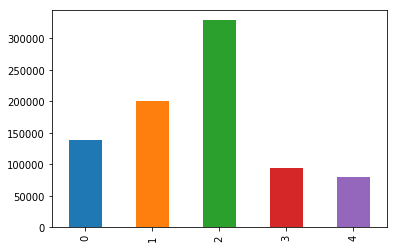

In [5]:
earnings.head().plot.bar()

In [6]:
chunk = []
lim = []
for i in range (0,29):
    lowerLim = i * 50000
    upperLim = (i+1) * 50000
    lim.append(upperLim)
    chunk.append(earnings[(lowerLim < earnings) & (earnings < upperLim)].count())
chunk

[1320,
 1385,
 3376,
 4388,
 4570,
 4087,
 2484,
 1692,
 1014,
 495,
 460,
 162,
 141,
 122,
 108,
 34,
 45,
 21,
 29,
 22,
 10,
 21,
 4,
 5,
 4,
 7,
 1,
 2,
 4]

In [7]:
df2 = pd.DataFrame({'count': chunk,
                    'price': lim})

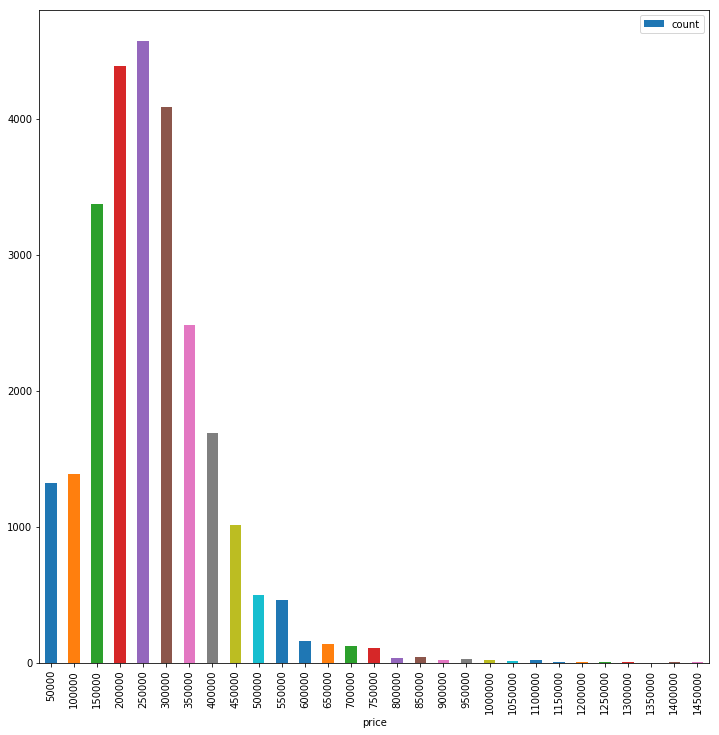

In [9]:
df2.plot(y = "count", x = "price", kind="bar", figsize=(12,12))

In [ ]:
df